In [ ]:
#Code Will Evaluate Final-Trained Models, create visualizations based on years 2021 and 2022 for prediction of hail-risk
#Note, as stated the results will vary drastically from normal, but whatever.

#Create Loaders for the years (cannot store all of test)
#Evaluate
#Normalize by percent-difference from mean
#Visualize

In [ ]:
from google.colab import drive
import os

#drive.mount('/content/gdrive')
drive.mount('/content/gdrive', force_remount=True)

print(os.getcwd())
os.chdir('gdrive/MyDrive/Deep_Learning_Project')
print(os.getcwd())

Mounted at /content/gdrive
/content
/content/gdrive/MyDrive/Deep_Learning_Project


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime
import os
import sklearn.preprocessing as skp
import collections
import time
import math
import matplotlib.pyplot as plt
import json
from sklearn.metrics import classification_report, confusion_matrix
import sklearn
import seaborn as sns

In [ ]:
total_files = list(zip(sorted(os.listdir('ERA_Numpy_Files')), sorted(os.listdir('NOAA_Event_Labels'))))

year_2021 = total_files[120:132]
year_2022 = total_files[132:]
test_files = total_files[120:]

#Quickly Geerate the Test-Labels
test_labelset = []
label_weights = {0:0, 1:0}
for files in test_files:
  a = np.load('NOAA_Event_Labels/'+files[1], mmap_mode='r')
  test_labelset.append(a)
test_labelset = np.concatenate(test_labelset, axis = 0)
print(test_labelset.shape)

#Get mean?
#Or not
#Sum then get means (simple enough)
test_lab_sum = np.sum(test_labelset, axis = 0)
test_lab_sum.shape

(17516, 20, 20, 1)


(20, 20, 1)

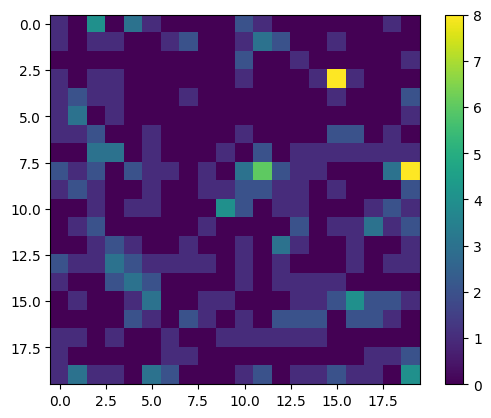

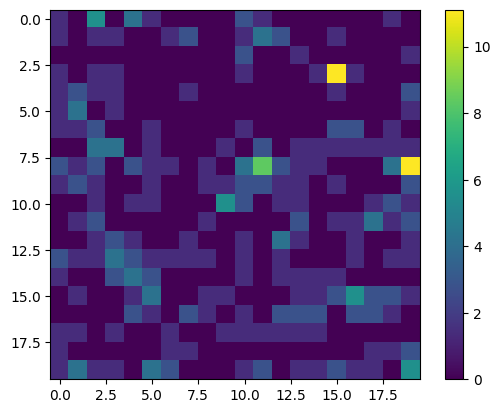

In [ ]:
test_lab_sum_re = test_lab_sum.reshape(20, 20)
test_lab_sum_re.shape
plt.imshow(test_lab_sum_re)
plt.colorbar()
plt.show()

test_lab_perc = test_lab_sum_re / np.mean(test_lab_sum_re)
plt.imshow(test_lab_perc)
plt.colorbar()
plt.show()

In [ ]:
np.set_printoptions(precision=3)
print(np.mean(test_lab_sum))
print(np.mean(test_labelset))
#Only about 0.72 hail events in entire area in the entire test set
#So the sum of the year is meaned to
print(test_lab_sum_re, end='\n\n')
print(test_lab_perc)
#Problem: Alot of areas just didn't get hail at all during these years.

0.72
4.110527517698105e-05
[[1. 0. 4. 0. 3. 1. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 1. 0. 0. 1. 2. 0. 0. 1. 3. 2. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 8. 1. 0. 0. 0.]
 [1. 2. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 2.]
 [1. 3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 2. 0. 1. 0.]
 [0. 0. 3. 3. 0. 1. 0. 0. 0. 1. 0. 2. 0. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 2. 0. 2. 1. 1. 0. 1. 0. 3. 6. 2. 1. 1. 0. 0. 0. 3. 8.]
 [1. 2. 1. 0. 0. 1. 0. 0. 1. 1. 2. 2. 1. 1. 0. 1. 0. 0. 0. 2.]
 [0. 0. 1. 0. 1. 1. 0. 0. 0. 4. 2. 0. 1. 1. 0. 0. 0. 1. 2. 1.]
 [0. 1. 2. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 0. 1. 1. 3. 1. 2.]
 [0. 0. 1. 2. 1. 0. 0. 1. 0. 0. 1. 0. 3. 1. 0. 0. 1. 0. 0. 1.]
 [2. 1. 1. 3. 2. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.]
 [1. 0. 0. 2. 3. 2. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 3. 0. 0. 1.

In [ ]:
#Do it for 2021
test_labelset_2021 = []
label_weights = {0:0, 1:0}
for files in year_2021:
  a = np.load('NOAA_Event_Labels/'+files[1], mmap_mode='r')
  test_labelset.append(a)
test_labelset_2021 = np.concatenate(test_labelset_2021, axis = 0)
print(test_labelset_2021.shape)

#Get mean?
#Or not
#Sum then get means (simple enough)
test_lab_sum_2021 = np.sum(test_labelset_2021, axis = 0)
test_lab_sum_2021.shape

(8760, 20, 20, 1)


(20, 20, 1)

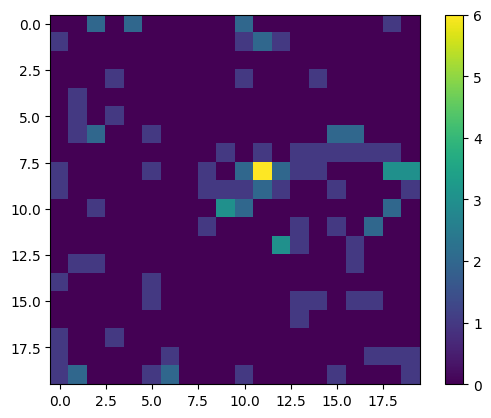

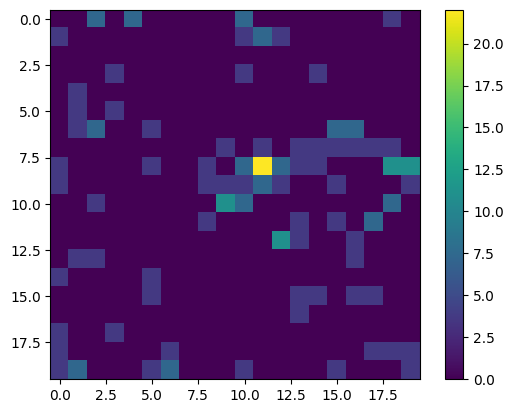

In [ ]:
test_lab_sum_re_2021 = test_lab_sum_2021.reshape(20, 20)
test_lab_sum_re_2021.shape
plt.imshow(test_lab_sum_re_2021)
plt.colorbar()
plt.show()

test_lab_perc_2021 = test_lab_sum_re_2021 / np.mean(test_lab_sum_re_2021)
plt.imshow(test_lab_perc_2021)
plt.colorbar()
plt.show()

In [ ]:
np.set_printoptions(precision=3)
print(np.mean(test_lab_sum_2021)) #Only about 0.72 hail events in entire area in the entire test set
print(test_lab_sum_re_2021, end='\n\n')
print(test_lab_perc_2021)

0.2725
[[0. 0. 2. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 2. 6. 2. 1. 1. 0. 0. 0. 3. 3.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 2. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 3. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0

In [ ]:
#Do it for 2022
test_labelset_2022 = []
label_weights = {0:0, 1:0}
for files in year_2022:
  a = np.load('NOAA_Event_Labels/'+files[1], mmap_mode='r')
  test_labelset.append(a)
test_labelset_2022 = np.concatenate(test_labelset_2022, axis = 0)
print(test_labelset_2022.shape)

#Get mean?
#Or not
#Sum then get means (simple enough)
test_lab_sum_2022 = np.sum(test_labelset_2022, axis = 0)
test_lab_sum_2022.shape

(8756, 20, 20, 1)


(20, 20, 1)

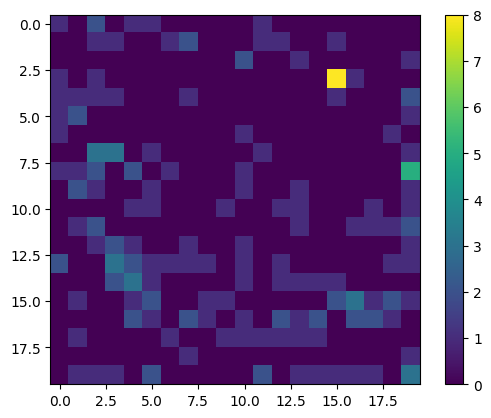

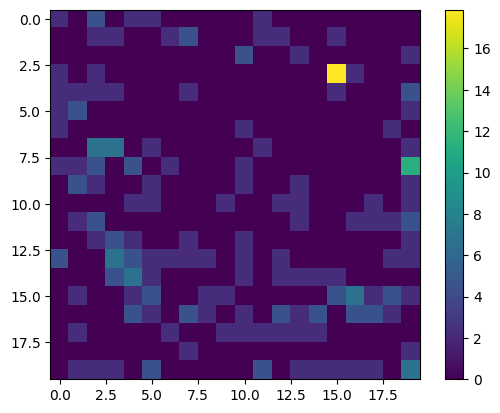

In [ ]:
test_lab_sum_re_2022 = test_lab_sum_2022.reshape(20, 20)
test_lab_sum_re_2022.shape
plt.imshow(test_lab_sum_re_2022)
plt.colorbar()
plt.show()

test_lab_perc_2022 = test_lab_sum_re_2022 / np.mean(test_lab_sum_re_2022)
plt.imshow(test_lab_perc_2022)
plt.colorbar()
plt.show()

In [ ]:
np.set_printoptions(precision=3)
print(np.mean(test_lab_sum_2022))
print(np.mean(test_labelset_2022))
print(test_lab_sum_re_2022, end='\n\n')
print(test_lab_perc_2022)

0.4475
5.1107811786203746e-05
[[1. 0. 2. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 2. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 1. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 2.]
 [1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 3. 3. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 2. 0. 2. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
 [0. 2. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 2.]
 [0. 0. 1. 2. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [2. 0. 0. 3. 2. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 2. 3. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 2. 0. 0.

In [ ]:
#Create Test Geneartors

In [ ]:
def generate_batchs(files, batch_size):
  counter = 0
  while True:
    fname = files[counter]
    counter = (counter + 1) % len(files)
    x = np.load('ERA_Numpy_Files/'+fname[0], mmap_mode='r')
    y = np.load('NOAA_Event_Labels/'+fname[1], mmap_mode='r')
    for local_index in range(0, x.shape[0], batch_size):
      input_local = x[local_index:(local_index+batch_size)]
      output_local = y[local_index:(local_index+batch_size)]
      yield input_local, output_local

def test_batchs(files, batch_size):
  counter = 0
  while True:
    fname = files[counter]
    counter += 1
    x = np.load('ERA_Numpy_Files/'+fname[0], mmap_mode='r')
    y = np.load('NOAA_Event_Labels/'+fname[1], mmap_mode='r')
    for local_index in range(0, x.shape[0], batch_size):
      input_local = x[local_index:(local_index+batch_size)]
      output_local = y[local_index:(local_index+batch_size)]
      yield input_local

In [ ]:
batch_size = 128

test_2021_features = tf.data.Dataset.from_generator(
    generator=lambda: test_batchs(files=year_2021, batch_size=batch_size),
    output_types=tf.float32,
    output_shapes=[None, 5, 20, 20, 148]
)

test_2021_all = tf.data.Dataset.from_generator(
    generator=lambda: generate_batchs(files=year_2021, batch_size=batch_size),
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 5, 20, 20, 148], [None, 20, 20, 1])
)

test_2022_features = tf.data.Dataset.from_generator(
    generator=lambda: test_batchs(files=year_2022, batch_size=batch_size),
    output_types=tf.float32,
    output_shapes=[None, 5, 20, 20, 148]
)

test_2022_all = tf.data.Dataset.from_generator(
    generator=lambda: generate_batchs(files=year_2022, batch_size=batch_size),
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 5, 20, 20, 148], [None, 20, 20, 1])
)

test_features = tf.data.Dataset.from_generator(
    generator=lambda: test_batchs(files=test_files, batch_size=batch_size),
    output_types=tf.float32,
    output_shapes=[None, 5, 20, 20, 148]
)

test_all = tf.data.Dataset.from_generator(
    generator=lambda: generate_batchs(files=test_files, batch_size=batch_size),
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 5, 20, 20, 148], [None, 20, 20, 1])
)

In [ ]:
#Model 1 (Praanetha's)
model_1 = tf.keras.models.load_model('Models_and_Histories/aratry_m1_final.h5')
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_1 (Conv3D)           (None, 5, 20, 20, 32)     127904    
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 2, 10, 10, 32)     0         
 g3D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               819328    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 400)               51600     
                                                      

              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91   7006112
         1.0       0.00      0.50      0.00       288

    accuracy                           0.84   7006400
   macro avg       0.50      0.67      0.46   7006400
weighted avg       1.00      0.84      0.91   7006400



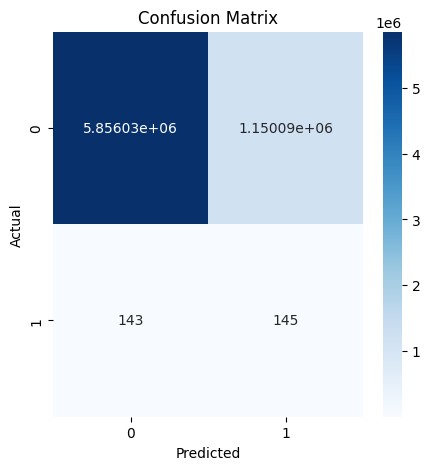

In [ ]:
#2021-2022 together predict + Evaluate
pred_test = model_1.predict(test_features, steps = (len(test_files)+1)*6)
pred_labels = (pred_test > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)


# Calculate the confusion matrix
print(classification_report(test_labelset.reshape(-1,1), pred_labels.reshape(-1,1)))
confusion = confusion_matrix(test_labelset.reshape(-1,1), pred_labels.reshape(-1,1))

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91   3503891
         1.0       0.00      0.52      0.00       109

    accuracy                           0.83   3504000
   macro avg       0.50      0.68      0.45   3504000
weighted avg       1.00      0.83      0.91   3504000



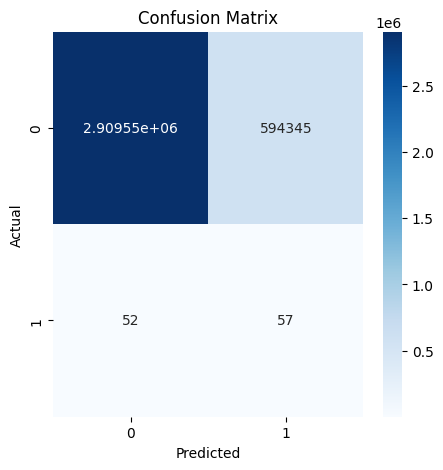

In [ ]:
#Predict 2021 + Evaluate
pred_2021 = model_1.predict(test_2021_features, steps = len(year_2021)*6)
pred_labels_2021 = (pred_2021 > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Calculate the confusion matrix
print(classification_report(test_labelset_2021.reshape(-1,1), pred_labels_2021.reshape(-1,1)))
confusion = confusion_matrix(test_labelset_2021.reshape(-1,1), pred_labels_2021.reshape(-1,1))

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


72/72 [==============================] - 315s 4s/step
              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91   3502221
         1.0       0.00      0.49      0.00       179

    accuracy                           0.84   3502400
   macro avg       0.50      0.67      0.46   3502400
weighted avg       1.00      0.84      0.91   3502400



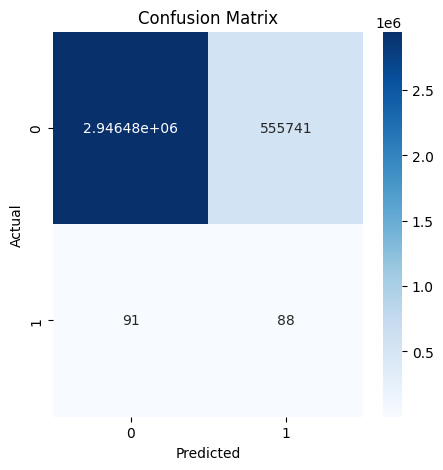

In [ ]:
#Predict 2022 + Evaluate
pred_2022 = model_1.predict(test_2022_features, steps = (len(year_2022)+1)*6)
pred_labels_2022 = (pred_2022 > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Calculate the confusion matrix
print(classification_report(test_labelset_2022.reshape(-1,1), pred_labels_2022.reshape(-1,1)))
confusion = confusion_matrix(test_labelset_2022.reshape(-1,1), pred_labels_2022.reshape(-1,1))

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Standardize + Visualize
#Total Testset Percent Change
pred_sum = np.sum(pred_test, axis = 0)
print(pred_sum_2021.shape)
pred_sum_re_2021 = pred_sum_2021.reshape(20, 20)
print(pred_sum_re_2021.shape)
pred_perc_2021 = pred_sum_re_2021 / np.mean(pred_sum_re_2021)
print(np.mean(pred_sum_re_2021))
print(np.mean(pred_2021))

#Create Percentage-Change for 2021
pred_sum_2021 = np.sum(pred_2021, axis = 0)
print(pred_sum_2021.shape)
pred_sum_re_2021 = pred_sum_2021.reshape(20, 20)
print(pred_sum_re_2021.shape)
pred_perc_2021 = pred_sum_re_2021 / np.mean(pred_sum_re_2021)
print(np.mean(pred_sum_re_2021))
print(np.mean(pred_2021))

#Create Percentage-Change for 2022
pred_sum_2022 = np.sum(pred_2022, axis = 0)
print(pred_sum_2022.shape)
pred_sum_re_2022 = pred_sum_2022.reshape(20, 20)
print(pred_sum_re_2022.shape)
pred_perc_2022 = pred_sum_re_2022 / np.mean(pred_sum_re_2022)
print(np.mean(pred_sum_re_2022))
print(np.mean(pred_2022))

(20, 20, 1)
(20, 20)
1722.0096
0.19657661
(20, 20, 1)
(20, 20)
1609.7347
0.18384369


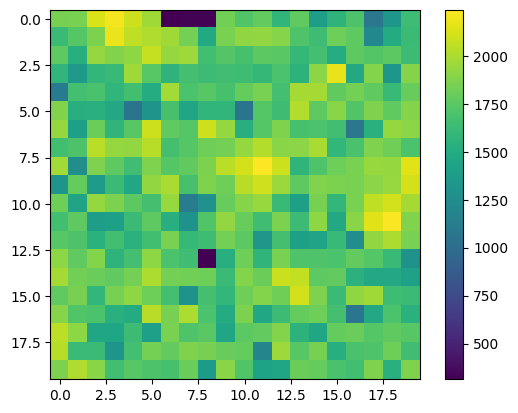

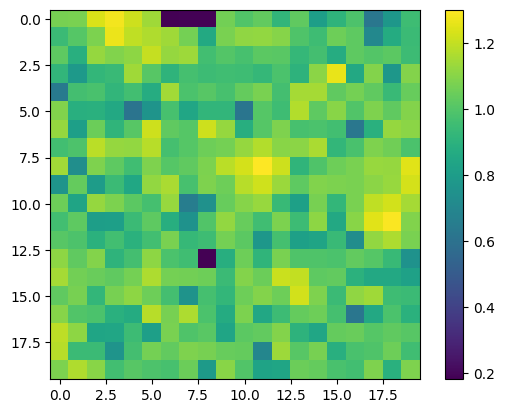

In [ ]:
pred_sum_re_2021 = pred_sum_2021.reshape(20, 20)
pred_sum_re_2021.shape
plt.imshow(pred_sum_re_2021)
plt.colorbar()
plt.show()

plt.imshow(pred_perc_2021)
plt.colorbar()
plt.show()

In [ ]:
np.set_printoptions(precision=3)
print(np.mean(pred_sum_2021))
print(pred_sum_re_2021, end='\n\n')
print(pred_perc_2021)

1722.0096
[[1845.142 1854.208 2135.664 2206.156 2090.748 1963.858  313.735  322.642
   321.819 1832.456 1718.555 1781.704 1581.609 1772.435 1396.712 1565.344
  1701.402 1077.532 1333.843 1643.96 ]
 [1628.118 1735.989 1863.206 2183.647 2055.654 2009.918 1967.219 1837.852
  1486.104 1853.445 1920.229 1928.696 1892.907 1706.611 1640.725 1812.516
  1760.908 1216.724 1499.706 1628.877]
 [1765.436 1528.476 1933.775 1876.213 1912.707 2071.867 1938.433 1961.708
  1654.313 1726.065 1682.062 1754.49  1750.754 1594.537 1662.767 1505.459
  1762.708 1722.071 1755.928 1635.902]
 [1580.315 1359.845 1593.35  1619.215 1965.541 1738.216 1563.489 1671.47
  1633.75  1652.609 1644.957 1594.799 1697.248 1558.294 1903.093 2173.686
  1479.368 1884.617 1334.239 1886.007]
 [1110.285 1667.023 1688.348 1582.199 1661.019 1504.412 1976.007 1697.661
  1741.474 1677.07  1787.498 1856.386 1668.612 1978.14  1979.665 1767.735
  1837.268 1767.974 1617.694 1796.398]
 [1875.011 1528.899 1538.675 1477.178 1056.289 1311.356 

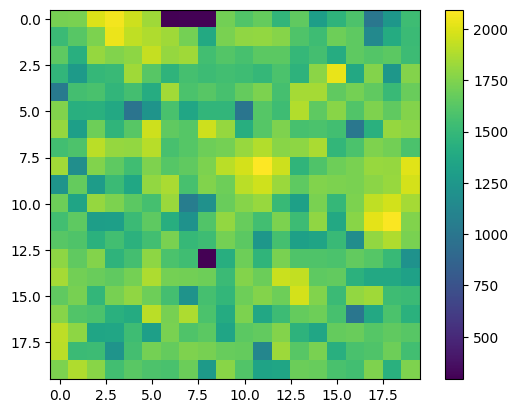

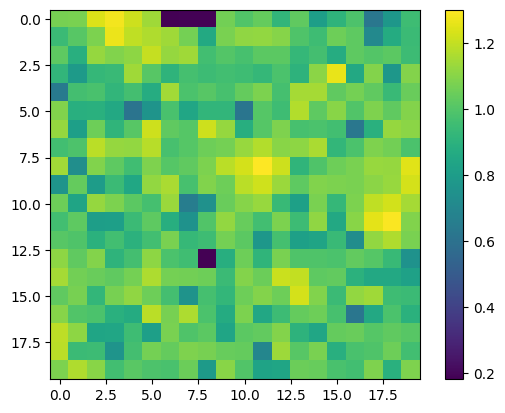

In [ ]:
pred_sum_re_2022 = pred_sum_2022.reshape(20, 20)
pred_sum_re_2022.shape
plt.imshow(pred_sum_re_2022)
plt.colorbar()
plt.show()

plt.imshow(pred_perc_2022)
plt.colorbar()
plt.show()

In [ ]:
np.set_printoptions(precision=3)
print(np.mean(pred_sum_2022))
print(pred_sum_re_2022, end='\n\n')
print(pred_perc_2022)

1609.7347
[[1724.766 1733.344 1996.51  2062.461 1954.505 1835.604  293.268  301.59
   300.817 1712.802 1606.342 1665.374 1478.385 1656.806 1305.598 1463.136
  1590.206 1007.204 1246.84  1536.76 ]
 [1521.822 1622.768 1741.528 2042.48  1921.444 1878.731 1838.762 1717.964
  1389.235 1732.565 1794.837 1802.767 1769.346 1595.205 1533.724 1694.281
  1646.089 1137.286 1401.882 1522.537]
 [1650.227 1428.688 1807.89  1753.765 1787.957 1936.503 1811.963 1833.727
  1546.305 1613.362 1572.345 1639.936 1636.462 1490.453 1554.223 1407.201
  1647.643 1609.674 1641.417 1529.134]
 [1477.158 1271.069 1489.445 1513.583 1837.308 1624.363 1461.483 1562.353
  1527.154 1545.091 1537.656 1490.811 1586.859 1456.576 1778.861 2031.722
  1382.85  1761.598 1247.276 1762.898]
 [1037.819 1558.26  1578.13  1478.906 1552.593 1406.609 1847.066 1586.871
  1627.775 1567.564 1670.798 1735.231 1559.73  1849.19  1850.422 1652.387
  1717.313 1652.601 1512.142 1678.807]
 [1752.734 1429.137 1438.231 1380.811  987.387 1225.786 

In [ ]:
#Model 2 (Alden's)
model_2 = tf.keras.models.load_model('Models_and_Histories/model_2_final.h5')
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 5, 20, 20, 64)     868608    
                                                                 
 batch_normalization (Batch  (None, 5, 20, 20, 64)     256       
 Normalization)                                                  
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 5, 20, 20, 64)     819456    
                                                                 
 batch_normalization_1 (Bat  (None, 5, 20, 20, 64)     256       
 chNormalization)                                                
                                                                 
 conv_lstm2d_2 (ConvLSTM2D)  (None, 5, 20, 20, 64)     295168    
                                                                 
 batch_normalization_2 (Bat  (None, 5, 20, 20, 64)     2

In [ ]:
#2021-2022 together predict + Evaluate
pred_test = model_2.predict(test_features, steps = (len(test_files)+1)*6)
pred_labels = (pred_test > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)


# Calculate the confusion matrix
print(classification_report(test_labelset.reshape(-1,1), pred_labels.reshape(-1,1)))
confusion = confusion_matrix(test_labelset.reshape(-1,1), pred_labels.reshape(-1,1))

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

72/72 [==============================] - 180s 2s/step
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95   3503891
         1.0       0.00      0.46      0.00       109

    accuracy                           0.90   3504000
   macro avg       0.50      0.68      0.47   3504000
weighted avg       1.00      0.90      0.95   3504000



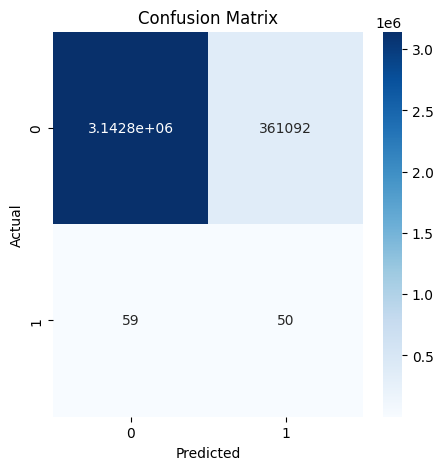

In [ ]:
#Predict 2021 + Evaluate
pred_2021 = model_2.predict(test_2021_features, steps = len(year_2021)*6)
pred_labels_2021 = (pred_2021 > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Calculate the confusion matrix
print(classification_report(test_labelset_2021.reshape(-1,1), pred_labels_2021.reshape(-1,1)))
confusion = confusion_matrix(test_labelset_2021.reshape(-1,1), pred_labels_2021.reshape(-1,1))

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


72/72 [==============================] - 184s 3s/step
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93   3502221
         1.0       0.00      0.68      0.00       179

    accuracy                           0.87   3502400
   macro avg       0.50      0.77      0.47   3502400
weighted avg       1.00      0.87      0.93   3502400



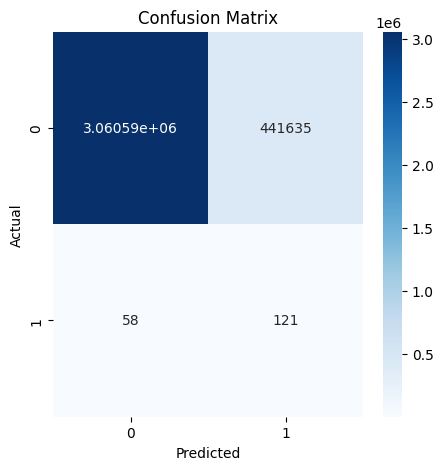

In [ ]:
#Predict 2022 + Evaluate
pred_2022 = model_2.predict(test_2022_features, steps = (len(year_2022)+1)*6)
pred_labels_2022 = (pred_2022 > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Calculate the confusion matrix
print(classification_report(test_labelset_2022.reshape(-1,1), pred_labels_2022.reshape(-1,1)))
confusion = confusion_matrix(test_labelset_2022.reshape(-1,1), pred_labels_2022.reshape(-1,1))

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Standardize + Visualize
#Create Percentage-Change for 2021
pred_sum_2021 = np.sum(pred_2021, axis = 0)
print(pred_sum_2021.shape)
pred_sum_re_2021 = pred_sum_2021.reshape(20, 20)
print(pred_sum_re_2021.shape)
pred_perc_2021 = pred_sum_re_2021 / np.mean(pred_sum_re_2021)
print(np.mean(pred_sum_re_2021))
print(np.mean(pred_2021))

#Create Percentage-Change for 2022
pred_sum_2022 = np.sum(pred_2022, axis = 0)
print(pred_sum_2022.shape)
pred_sum_re_2022 = pred_sum_2022.reshape(20, 20)
print(pred_sum_re_2022.shape)
pred_perc_2022 = pred_sum_re_2022 / np.mean(pred_sum_re_2022)
print(np.mean(pred_sum_re_2022))
print(np.mean(pred_2022))

(20, 20, 1)
(20, 20)
870.9264
0.099421374
(20, 20, 1)
(20, 20)
1025.4769
0.11711794


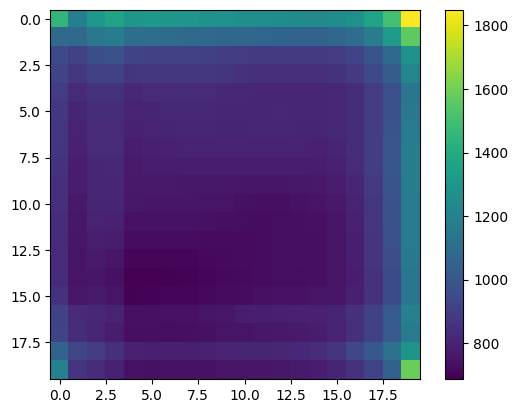

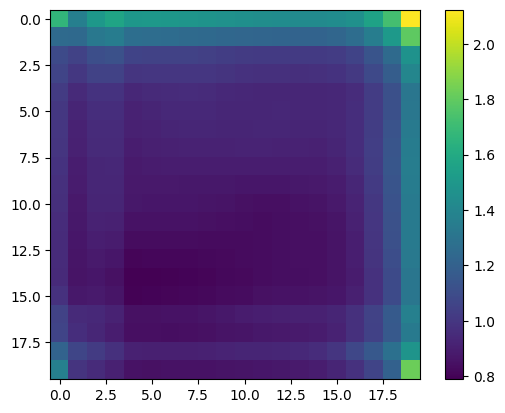

In [ ]:
pred_sum_re_2021 = pred_sum_2021.reshape(20, 20)
pred_sum_re_2021.shape
plt.imshow(pred_sum_re_2021)
plt.colorbar()
plt.show()

plt.imshow(pred_perc_2021)
plt.colorbar()
plt.show()

In [ ]:
np.set_printoptions(precision=3)
print(np.mean(pred_sum_2021))
print(pred_sum_re_2021, end='\n\n')
print(pred_perc_2021)

870.9264
[[1450.435 1188.135 1306.488 1364.629 1302.768 1304.526 1301.879 1294.87
  1285.657 1276.141 1266.169 1258.774 1252.515 1245.259 1241.662 1251.814
  1269.657 1357.194 1500.853 1849.688]
 [1088.58  1082.239 1151.708 1173.219 1106.09  1103.504 1096.365 1089.658
  1083.415 1076.274 1068.554 1064.504 1060.941 1057.749 1057.639 1071.898
  1100.069 1180.151 1312.755 1561.758]
 [ 946.846  916.563  967.921  973.329  918.711  918.126  916.595  913.92
   907.015  899.246  889.917  886.125  884.172  883.183  883.001  894.741
   920.921  988.566 1088.509 1280.813]
 [ 922.886  874.115  915.58   917.896  866.252  868.781  871.284  871.176
   868.597  859.609  850.321  846.6    846.042  845.549  845.883  854.716
   879.537  941.317 1031.575 1221.312]
 [ 886.814  824.59   857.407  855.858  815.499  823.643  830.335  832.54
   828.287  821.08   814.099  812.61   812.103  812.681  810.256  817.137
   836.383  891.292  971.727 1143.784]
 [ 875.057  805.034  837.555  840.424  799.647  807.585  81

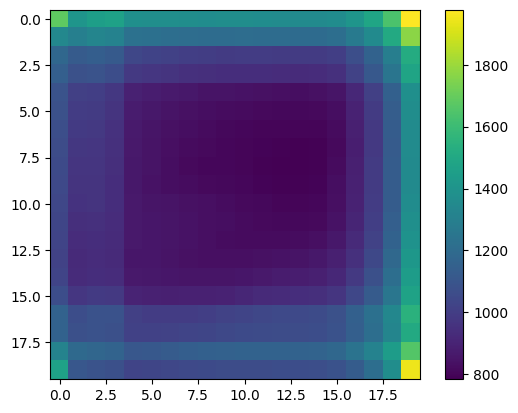

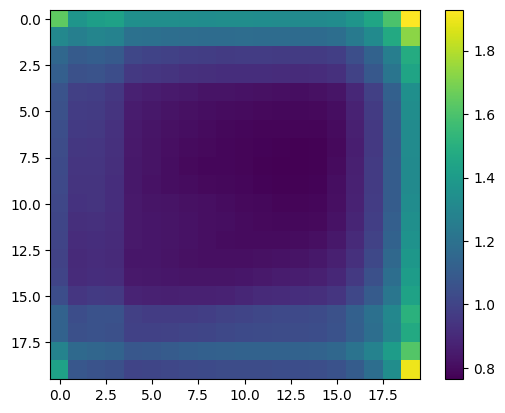

In [ ]:
pred_sum_re_2022 = pred_sum_2022.reshape(20, 20)
pred_sum_re_2022.shape
plt.imshow(pred_sum_re_2022)
plt.colorbar()
plt.show()

plt.imshow(pred_perc_2022)
plt.colorbar()
plt.show()

In [ ]:
np.set_printoptions(precision=3)
print(np.mean(pred_sum_2022))
print(pred_sum_re_2022, end='\n\n')
print(pred_perc_2022)

1025.4769
[[1682.687 1407.068 1452.871 1465.04  1378.358 1375.624 1373.22  1367.631
  1365.614 1366.901 1368.784 1364.878 1360.199 1355.402 1353.38  1363.064
  1405.351 1484.451 1638.857 1977.839]
 [1340.818 1299.934 1326.293 1314.915 1230.235 1224.01  1216.905 1208.338
  1205.768 1206.1   1209.123 1206.969 1204.748 1201.784 1200.907 1216.474
  1273.653 1356.675 1508.513 1769.585]
 [1180.303 1128.392 1142.214 1121.57  1035.725 1023.462 1014.448 1004.942
   998.941  993.631  996.407  995.674  993.361  989.857  991.699 1006.241
  1069.696 1160.471 1296.535 1516.949]
 [1146.777 1078.751 1089.382 1065.906  982.87   971.879  962.319  950.998
   944.125  941.436  940.834  938.81   936.06   932.345  933.195  950.612
  1018.454 1112.233 1248.114 1481.294]
 [1087.115 1010.296 1005.511  976.272  894.372  880.581  870.96   859.752
   848.332  845.843  840.516  835.897  830.813  830.386  835.25   851.233
   916.642 1012.299 1150.303 1379.385]
 [1078.5    994.408  991.683  961.917  876.966  860.276

In [ ]:
#Model 3 (Bobbie's)